# Mega Case Study - Make a Hybrid Deep Learning Model

## Part 1: Identify the Frauds with the SOM

##### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)
print(x)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


##### Training the SOM

In [5]:
!pip install MiniSom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=d27464dca1a46c80b50eef32131be4a1c2beaead3eab30de6817768794111710
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


In [7]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

##### Visualizing the Results

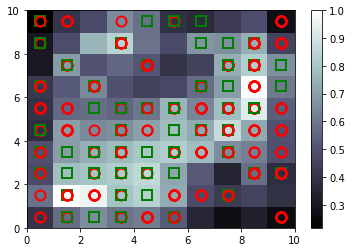

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, X in enumerate(x):
  w = som.winner(X)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)

##### Finding the Frauds

In [9]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(8,6)], mappings[(1,2)], mappings[(2,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

# Part 2: Going from Unsupervised to Supervised Deep Learning Model

### Creating the matrix of features

In [10]:
customers = dataset.iloc[:, 1:].values
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

### Creating the dependent variable

In [13]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

## Part 3: Artificial Neural Network

#### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)
customers

array([[ 0.68873723, -0.80105183,  1.34711063, ..., -0.48835847,
         0.03738039, -0.89530251],
       [-1.45193254, -0.75124044,  0.45054795, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [-1.45193254, -0.35021653,  1.95822062, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [ 0.68873723,  0.79628971, -0.94857229, ...,  2.18552419,
        -0.19541334,  1.11694091]])

### Building the ANN

#### Importing the Tensorflow Library

In [16]:
import tensorflow as tf

### Initializing the ANN

In [17]:
ann=tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=2,activation='relu'))

### Adding the output layer

In [19]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Compiling the ANN

In [20]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
ann.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 981us/step - loss: 0.4234 - accuracy: 0.9609
Epoch 2/2
690/690 [==============================] - 1s 965us/step - loss: 0.2604 - accuracy: 0.9609


## Predicting the Probabilities of Fraud

In [22]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred

22/22 [==============================] - 0s 876us/step


array([[1.57761560e+07, 3.60075980e-02],
       [1.57395480e+07, 2.02213854e-01],
       [1.56628540e+07, 1.65866449e-01],
       ...,
       [1.56754500e+07, 1.07149087e-01],
       [1.57764940e+07, 3.06868684e-02],
       [1.55924120e+07, 1.13605723e-01]])

In [23]:
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

[[1.56214230e+07 1.17082288e-06]
 [1.57901130e+07 3.48353533e-05]
 [1.55836800e+07 1.02522119e-03]
 ...
 [1.57921070e+07 3.22038025e-01]
 [1.56119730e+07 3.22038025e-01]
 [1.57815740e+07 3.22038025e-01]]


Here is the predicted probabilities of Fradulent Customers.